# Cross-Validation

## Understanding overfitting using `red wine quality dataset`

In [1]:
import pandas as pd 
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5    
}

# you can use the map function of pandas with any dictionary 
# to convert the values in a given column to values in the dictionary

df.loc[:, 'quality'] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [4]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [5]:
len(df)

1599

#### We will divide this data into two parts: 1000 samples for training and 59 as a separate set

In [6]:
# Splitting the data

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe

df = df.sample(frac=1).reset_index(drop=True)

# select top 1000 rows for training
df_train = df.head(1000)


# select bottom 599 values for testing/validation
df_test = df.tail(599)

In [7]:
len(df_train)

1000

In [8]:
len(df_test)

599

In [9]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.38,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,2
1,8.0,0.45,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2,3
2,7.4,0.55,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,2
3,11.2,0.40,0.50,2.0,0.099,19.0,50.0,0.99783,3.10,0.58,10.4,2
4,5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,3


In [10]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,2
1001,7.2,0.390,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,2
1002,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,2
1003,6.4,0.420,0.09,2.3,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,3
1004,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,3


#### We will now train a decision tree model on the training set.

In [11]:
# import from scikit learn
from sklearn import tree
from sklearn import metrics


# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)


# choose the columns you want to train on 
# these are the features for the model
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']


# train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [12]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])


# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
print(f"Train Accuracy: {train_accuracy}")


# calculate accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.613
Test Accuracy: 0.5626043405676127


#### Now, we increase the max_depth to 7 and repeat the process

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])


# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
print(f"Train Accuracy: {train_accuracy}")


# calculate accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8
Test Accuracy: 0.5959933222036727


#### We calculate these accuracies for different values of max_depth and make a plot

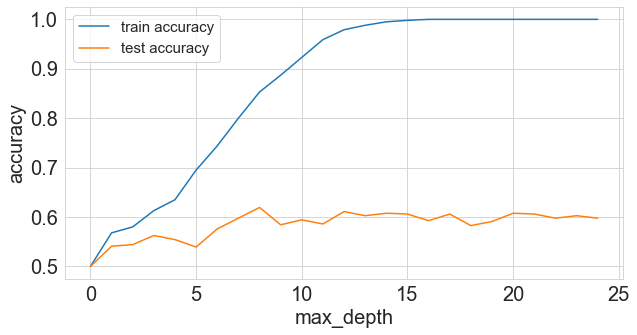

In [14]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

# this is our global size of label text on the plots (rc=runtime configuration)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# this line ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # initialize the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training (this can also be done outside the for loop)
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# create two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()